<a href="https://colab.research.google.com/github/Devadetharu/DSA_Assignments.ipynb/blob/main/CaseStudy_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.naive_bayes import GaussianNB #nb
from sklearn.tree import DecisionTreeClassifier #dt
from sklearn.svm import SVC #svm
from sklearn.model_selection import GridSearchCV #model fine tuning
from sklearn.ensemble import RandomForestClassifier  # Model Feature Selection

In [134]:
df_td = pd.read_csv('/content/Training_data.csv')
df_td.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [135]:
df_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [136]:
cat_cols = df_td.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df_td[col].value_counts(dropna=False))

print("Categorical columns:\n", cat_cols)



Column: customerID
customerID
3402-XRIUO    1
9509-MPYOD    1
3082-VQXNH    1
8190-ZTQFB    1
1258-YMZNM    1
             ..
4697-LUPSU    1
7048-GXDAY    1
6682-VCIXC    1
4884-LEVMQ    1
2208-UGTGR    1
Name: count, Length: 5634, dtype: int64

Column: gender
gender
Male      2744
Female    2721
NaN        169
Name: count, dtype: int64

Column: Partner
Partner
No     2890
Yes    2744
Name: count, dtype: int64

Column: Dependents
Dependents
No     3960
Yes    1674
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    5081
No      553
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  2701
Yes                 2380
No phone service     553
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    2486
DSL            1945
No             1203
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     2720
Yes                    1574
No internet service    1171
NaN                     169
Na

In [137]:
df_td['MultipleLines']=df_td['MultipleLines'].replace('No phone service','No')

In [138]:
internet_dependent_cols = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]
for col in internet_dependent_cols:
    df_td[col] = df_td[col].replace('No internet service', 'No')
df_td['StreamingTV'].value_counts()

,count
StreamingTV,
No,3447
Yes,2187


Checking and removing duplicates

In [139]:
df_td.duplicated().sum()

np.int64(0)

In [140]:
df_td.drop_duplicates(inplace=True)
df_td.reset_index(drop=True, inplace=True)

# Handle missing values

In [141]:
df_td.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [142]:
# Removing customerID
df_td.drop(columns=['customerID'], inplace=True)

### Adding missing value

In [143]:
df_td['TotalCharges'] = pd.to_numeric(df_td['TotalCharges'], errors='coerce')
df_td['TotalCharges'].isna().sum()

np.int64(290)

In [144]:
df_td.fillna({
    'gender': df_td['gender'].fillna(df_td['gender'].mode()[0]),
    'OnlineSecurity': df_td['OnlineSecurity'].fillna(df_td['OnlineSecurity'].mode()[0]),
    'MonthlyCharges': df_td['MonthlyCharges'].fillna(df_td['MonthlyCharges'].median()),
    'TotalCharges': df_td['TotalCharges'].fillna(df_td['TotalCharges'].median())
}, inplace=True)


In [145]:
df_td.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [146]:
df_td = df_td.dropna(subset=['gender','OnlineSecurity']).reset_index(drop=True)

In [147]:
df_td.shape

(5634, 20)

In [148]:
df_td.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# Outlier Removal

<Axes: >

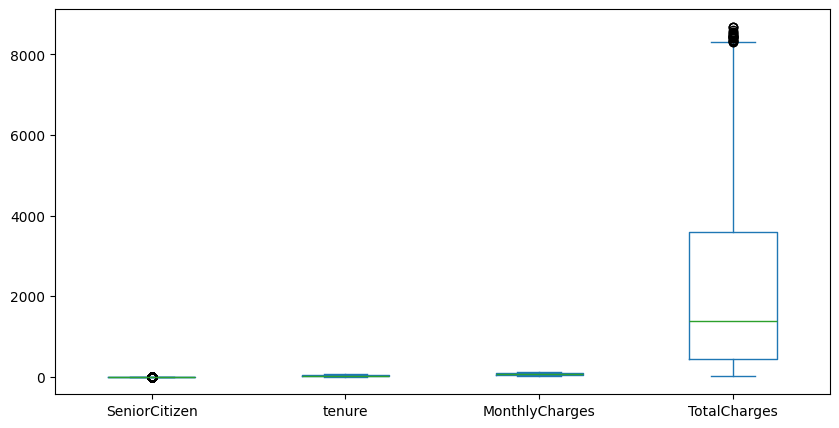

In [149]:
df_td.plot(kind='box',figsize=(10,5))

In [150]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    Q1 = df_td[col].quantile(0.25)
    Q3 = df_td[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df_td[col] < lower) | (df_td[col] > upper)).sum()

    if outlier_count > 0:
        print(col, "=", outlier_count, "outliers")
        print(f"  Lower Bound: {lower}")
        print(f"  Upper Bound: {upper}")

        # clip function to set the value in range between lower and upper bound
        df_td[col] = df_td[col].clip(lower=lower, upper=upper)

TotalCharges = 24 outliers
  Lower Bound: -4270.65
  Upper Bound: 8307.25


<Axes: >

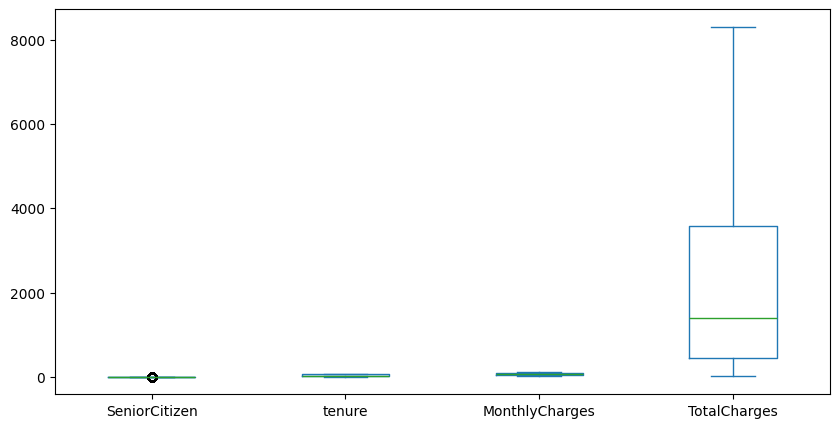

In [151]:
df_td.plot(kind='box',figsize=(10,5))

# Feature Engineering

In [152]:
df_td1 = df_td.select_dtypes(include=['number'])
corr = df_td1.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.022672,0.205024,0.101482
tenure,0.022672,1.000000,0.232216,0.797174
MonthlyCharges,0.205024,0.232216,1.000000,0.606938
TotalCharges,0.101482,0.797174,0.606938,1.000000


<Axes: >

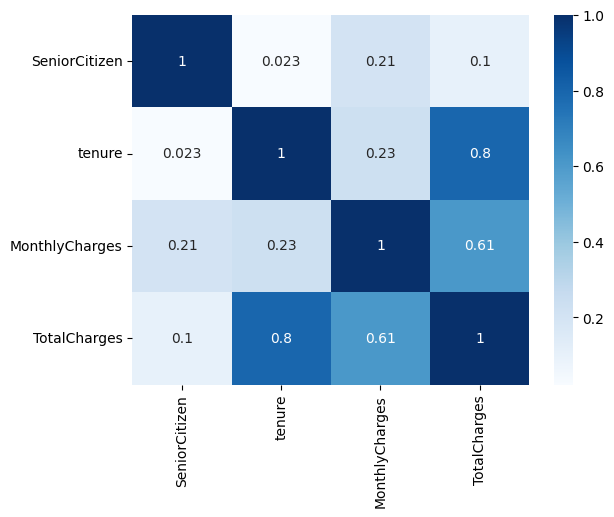

In [153]:
sns.heatmap(corr, annot=True, cmap='Blues')

In [154]:
# Create CLV
df_td['CLV'] = df_td['tenure'] * df_td['MonthlyCharges']

In [155]:
# Average monthly spend
df_td['AvgMonthlySpend'] = df_td['TotalCharges'] / (df_td['tenure'] + 1)

In [156]:
df_td['TenureGroup'] = pd.cut(
    df_td['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1yr', '1-2yr', '2-4yr', '4-6yr']
)

In [157]:
contract_weight = {
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
}
df_td['ContractWeight'] = df_td['Contract'].map(contract_weight)
df_td['Tenure_Contract'] = df_td['tenure'] * df_td['ContractWeight']

In [158]:
df_td[['CLV', 'AvgMonthlySpend', 'TenureGroup','Tenure_Contract']].head()

,CLV,AvgMonthlySpend,TenureGroup,Tenure_Contract
0,726.25,19.456944,2-4yr,420
1,1001.00,33.151724,2-4yr,28
2,5521.60,97.913158,4-6yr,56
3,797.55,19.750000,2-4yr,936
4,2203.75,48.900000,2-4yr,516


# Encoding & Scaling

In [159]:
df_td['Churn'] = df_td['Churn'].map({'Yes': 1, 'No': 0})

In [160]:
oh_col=['gender','PaymentMethod','Contract','StreamingMovies','StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity','InternetService','MultipleLines', 'TenureGroup']
le_cols=['Partner','Dependents','PhoneService','PaperlessBilling']

In [161]:
#one-Hot encoding
df_td = pd.get_dummies(df_td,columns=oh_col,drop_first=True)

In [162]:
# Label Encoding

le= LabelEncoder()
for col in le_cols:
  if col in df_td.columns:
    df_td[col]=le.fit_transform(df_td[col])

In [163]:
#scale the numerical feature
scaler = MinMaxScaler()
df_td[num_cols] = scaler.fit_transform(df_td[num_cols])

In [164]:
df_td[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000
mean,0.452873,0.470050,0.267691
std,0.341875,0.288764,0.267172
min,0.000000,0.000000,0.000000
25%,0.125000,0.256219,0.051543
50%,0.402778,0.521393,0.166208
75%,0.777778,0.704975,0.430926
max,1.000000,1.000000,1.000000


# Train-Test Split

In [165]:
x = df_td.drop('Churn', axis=1)
y = df_td['Churn']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=55)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4507, 30)
(1127, 30)
(4507,)
(1127,)


### Logistic Regression

In [185]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [186]:
y_pred_log_reg = log_reg.predict(X_test)

In [188]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("Accuracy Score : ",Acc_log_reg)
print("Precision Score : ",prec_log_reg)
print("Recall Score : ",Rec_log_reg)
print("f1 Score : ",f1_log_reg)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_log_reg)

Accuracy Score :  0.8003549245785271
Precision Score :  0.65
Recall Score :  0.5577557755775577
f1 Score :  0.5620437956204379
Logistic Regression Confusion Matrix:
[[733  91]
 [149 154]]


### KNN

In [192]:
knn_model_euclidean = KNeighborsClassifier(metric='euclidean')
knn_model_euclidean.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [193]:
y_pred_knn_euclidean = knn_model_euclidean.predict(X_test)

In [203]:
accuracy_list = []
neighbors_range = np.arange(1,30)

for k in neighbors_range:
  classifier = KNeighborsClassifier(n_neighbors=k , metric='minkowski',p=2)  # initialising classifier for iteration using Euclidian p=2
  #Training the ML model
  classifier.fit(X_train, y_train)
  y_pred_eu=classifier.predict(X_test)  #predict using trained ML model
  acc = accuracy_score(y_test,y_pred_eu)  # evaluate the ML model
  accuracy_list.append(acc) #appending acc list with accuracy achieved for each value of k

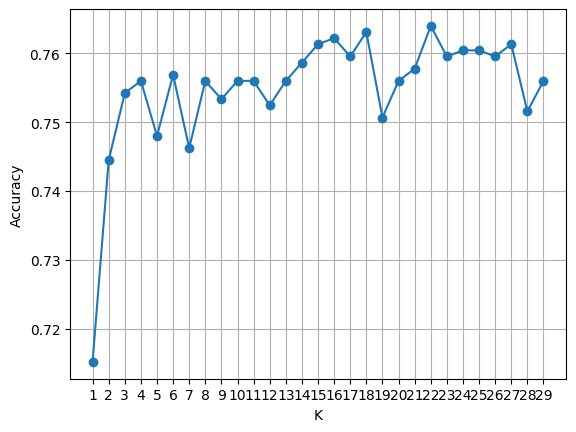

In [204]:
plt.plot(neighbors_range, accuracy_list,'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.grid()

In [197]:
classifier_knn = KNeighborsClassifier(n_neighbors=25, metric='euclidean')
classifier_knn.fit(X_train,y_train)
y_pred_knn_eu = classifier_knn.predict(X_test)
acc_knn=accuracy_score(y_test,y_pred_knn_eu)
prec_knn=precision_score(y_test,y_pred_knn_eu)
rec_knn=recall_score(y_test,y_pred_knn_eu)
f1_knn=f1_score(y_test,y_pred_knn_eu)

print('Accuracy:',acc_knn)
print('Precision:',prec_knn)
print('Recall:',rec_knn)
print('F1 Score:',f1_knn)
confusion_matrix(y_test,y_pred_knn_eu)

Accuracy: 0.7604259094942325
Precision: 0.5746606334841629
Recall: 0.41914191419141916
F1 Score: 0.4847328244274809


array([[730,  94],
       [176, 127]])

In [207]:
#manhattan
accuracy_list1 = []
neighbors_range1 = np.arange(1,30)

for k in neighbors_range:
  classifier1 = KNeighborsClassifier(n_neighbors=k , metric='minkowski',p=1)  # initialising classifier for iteration using manhattan p=1
  #Training the ML model
  classifier1.fit(X_train, y_train)
  y_pred_mn=classifier1.predict(X_test)  #predict using trained ML model
  acc1 = accuracy_score(y_test,y_pred_mn)  # evaluate the ML model
  accuracy_list1.append(acc1) #appending acc list with accuracy achieved for each value of k

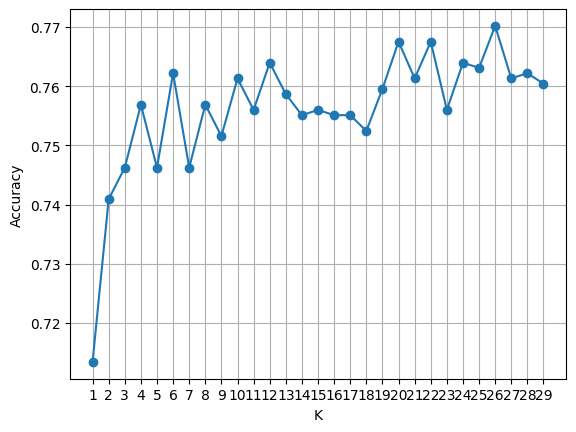

In [206]:
plt.plot(neighbors_range1, accuracy_list1,'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range1)
plt.grid()

In [208]:
classifier1_knn = KNeighborsClassifier(n_neighbors=28, metric='manhattan') #using K=28
classifier1_knn.fit(X_train,y_train)
y_pred_knn_mn = classifier1_knn.predict(X_test)
acc_knn1=accuracy_score(y_test,y_pred_knn_mn)
prec_knn1=precision_score(y_test,y_pred_knn_mn)
rec_knn1=recall_score(y_test,y_pred_knn_mn)
f1_knn1=f1_score(y_test,y_pred_knn_mn)

In [209]:
print('Accuracy:',acc_knn1)
print('Precision:',prec_knn1)
print('Recall:',rec_knn1)
print('F1 Score:',f1_knn1)
confusion_matrix(y_test,y_pred_knn_mn)

Accuracy: 0.7622005323868678
Precision: 0.583732057416268
Recall: 0.40264026402640263
F1 Score: 0.4765625


array([[737,  87],
       [181, 122]])

### Naive Baye's

In [211]:
#initializing the model
nb=GaussianNB()
#training the model
nb.fit(X_train,y_train)
#predict using trained ML model
y_pred_nb=nb.predict(X_test)
#evaluate the model
acc_nb=accuracy_score(y_test,y_pred_nb)
prec_nb=precision_score(y_test,y_pred_nb)
rec_nb=recall_score(y_test,y_pred_nb)
f1_nb=f1_score(y_test,y_pred_nb)

print('Accuracy:',acc_nb)
print('Precision:',prec_nb)
print('Recall:',rec_nb)
print('F1 Score:',f1_nb)
confusion_matrix(y_test,y_pred_nb)

Accuracy: 0.7080745341614907
Precision: 0.4751908396946565
Recall: 0.8217821782178217
F1 Score: 0.6021765417170496


array([[549, 275],
       [ 54, 249]])

### Decision Tree

In [213]:
#initializing the model
dt=DecisionTreeClassifier()
#training the model
dt.fit(X_train,y_train)
#predict using trained ML model
y_pred_dt=dt.predict(X_test)
#evaluate the model
acc_dt=accuracy_score(y_test,y_pred_dt)
prec_dt= precision_score(y_test,y_pred_dt)
rec_dt=recall_score(y_test,y_pred_dt)
f1_dt=f1_score(y_test,y_pred_dt)

print('Accuracy:',acc_dt)
print('Precision:',prec_dt)
print('Recall:',rec_dt)
print('F1 Score:',f1_dt)
confusion_matrix(y_test,y_pred_dt)

Accuracy: 0.7275953859804791
Precision: 0.4934210526315789
Recall: 0.49504950495049505
F1 Score: 0.4942339373970346


array([[670, 154],
       [153, 150]])

### SVM

In [214]:
# # create SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True)
# # train model
svm_model.fit(X_train, y_train)
#  predict using trained ML model
y_pred_svm = svm_model.predict(X_test)

In [216]:
Acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Accuracy:", Acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)
print("F1 score:", f1_svm)

Accuracy: 0.6282165039929015
Precision: 0.4126506024096386
Recall: 0.9042904290429042
F1 score: 0.5667011375387797


In [221]:
# Model Performance and its comparison
Output = pd.DataFrame({
    'Model': ['Decision Tree','Logistic Regression','Naive Bayes','SVM','KNN'],
    'Accuracy': [acc_dt,Acc_log_reg,acc_nb,Acc_svm,acc_knn],
    'Precision': [prec_dt,prec_log_reg,prec_nb,prec_svm,prec_knn],
    'Recall': [rec_dt,Rec_log_reg,rec_nb,rec_svm,rec_knn],
    'F1 Score': [f1_dt,f1_log_reg,f1_nb,f1_svm,f1_knn]
})

Output

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.727595,0.493421,0.495050,0.494234
1,Logistic Regression,0.800355,0.650000,0.557756,0.562044
2,Naive Bayes,0.708075,0.475191,0.821782,0.602177
3,SVM,0.628217,0.412651,0.904290,0.566701
4,KNN,0.760426,0.574661,0.419142,0.484733


logistic regression is better result out of all

### Load Data

In [283]:
df_te = pd.read_csv('/content/Testing_data.csv')

In [284]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [285]:
#removing customerID and churn
df_te.drop(columns=['customerID','Churn'],inplace=True)

In [286]:
#Removing duplicate value
df_te.duplicated().sum()

np.int64(3)

In [287]:
df_te = df_te.drop_duplicates()

## Handling Missing Values

In [288]:
df_te.isnull().sum().sort_values(ascending=False)

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


### Feature Engineering

In [289]:
tes1=df_te.select_dtypes(include=['number'])
corr1=tes1.corr()
corr1

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,-0.007401,0.248601
tenure,-0.007401,1.000000,0.277717
MonthlyCharges,0.248601,0.277717,1.000000


<Axes: >

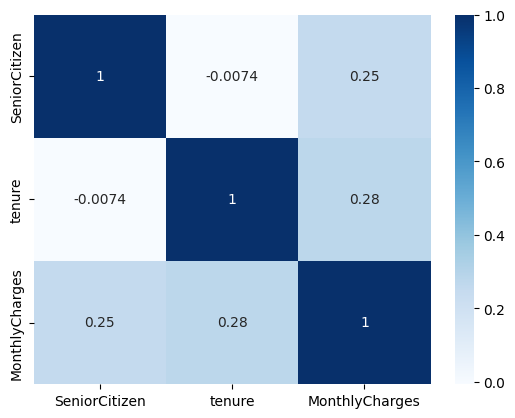

In [290]:
sns.heatmap(corr1,annot=True,cmap='Blues')

In [291]:
# Create CLV
df_te['CLV'] = df_te['tenure'] * df_te['MonthlyCharges']

In [266]:
df_te['TenureGroup'] = pd.cut(
    df_te['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1yr', '1-2yr', '2-4yr', '4-6yr']
)

In [270]:
# Tenure-Contract Interaction
contract_weight = {
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
}
df_te['ContractWeight'] = df_te['Contract'].map(contract_weight)
df_te['Tenure_Contract'] = df_te['tenure'] * df_te['ContractWeight']

In [294]:
for col in df_te.columns:
    print(f"\nColumn: {col}")
    print(df_te[col].value_counts(dropna=False))


Column: gender
gender
Male      722
Female    684
Name: count, dtype: int64

Column: SeniorCitizen
SeniorCitizen
0    1164
1     242
Name: count, dtype: int64

Column: Partner
Partner
No     748
Yes    658
Name: count, dtype: int64

Column: Dependents
Dependents
No     970
Yes    436
Name: count, dtype: int64

Column: tenure
tenure
1     136
72     60
2      50
3      46
71     37
     ... 
56     10
41      8
44      8
36      6
0       2
Name: count, Length: 73, dtype: int64

Column: PhoneService
PhoneService
Yes    1277
No      129
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  686
Yes                 591
No phone service    129
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    608
DSL            476
No             322
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     690
Yes                    394
No internet service    322
Name: count, dtype: int64

Column: OnlineBackup
Onlin

In [295]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1406 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1406 non-null   object 
 1   SeniorCitizen     1406 non-null   int64  
 2   Partner           1406 non-null   object 
 3   Dependents        1406 non-null   object 
 4   tenure            1406 non-null   int64  
 5   PhoneService      1406 non-null   object 
 6   MultipleLines     1406 non-null   object 
 7   InternetService   1406 non-null   object 
 8   OnlineSecurity    1406 non-null   object 
 9   OnlineBackup      1406 non-null   object 
 10  DeviceProtection  1406 non-null   object 
 11  TechSupport       1406 non-null   object 
 12  StreamingTV       1406 non-null   object 
 13  StreamingMovies   1406 non-null   object 
 14  Contract          1406 non-null   object 
 15  PaperlessBilling  1406 non-null   object 
 16  PaymentMethod     1406 non-null   object 
 17  

In [297]:
# Binary Encoding
binary1_cols = ['gender', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling']

for col in binary1_cols:
    df_te[col] = df_te[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [305]:
# Scaling
scale_cols= ['SeniorCitizen','tenure','MonthlyCharges',
             'CLV']

df_te[scale_cols] = scaler.fit_transform(df_te[scale_cols])

In [306]:
df_te.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CLV
0,1,0.0,1,1,0.555556,1,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,0.625626,3292.3,0.381651
1,0,0.0,1,0,0.166667,1,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,0,Electronic check,0.602102,876.75,0.111182
2,1,0.0,0,0,0.597222,1,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,1,Electronic check,0.813814,4211.55,0.505264
3,1,0.0,0,0,1.000000,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,1,Electronic check,0.995996,8547.15,1.000000
4,0,0.0,0,0,0.138889,0,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,0,Electronic check,0.175676,374,0.042595


In [312]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1406 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1406 non-null   int64  
 1   SeniorCitizen     1406 non-null   float64
 2   Partner           1406 non-null   int64  
 3   Dependents        1406 non-null   int64  
 4   tenure            1406 non-null   float64
 5   PhoneService      1406 non-null   int64  
 6   MultipleLines     1406 non-null   object 
 7   InternetService   1406 non-null   object 
 8   OnlineSecurity    1406 non-null   object 
 9   OnlineBackup      1406 non-null   object 
 10  DeviceProtection  1406 non-null   object 
 11  TechSupport       1406 non-null   object 
 12  StreamingTV       1406 non-null   object 
 13  StreamingMovies   1406 non-null   object 
 14  Contract          1406 non-null   object 
 15  PaperlessBilling  1406 non-null   int64  
 16  PaymentMethod     1406 non-null   object 
 17  